In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('/content/drive/MyDrive/preparation examen/Analyse/Business_sales_EDA.csv')
df

,Product ID;Product Position;Promotion;Product Category;Seasonal;Sales Volume;brand;url;name;description;price;currency;terms;section;season;material;origin
0,185102;Aisle;Yes;clothing;Yes;1243;Zara;https:...
1,188771;Aisle;Yes;clothing;No;1429;Zara;https:/...
2,180176;End-cap;Yes;clothing;Yes;1168;Zara;http...
3,112917;Aisle;Yes;clothing;No;1348;Zara;https:/...
4,192936;End-cap;Yes;clothing;Yes;1602;Zara;http...
...,...
20247,219627;Front of Store;Yes;clothing;No;1754;Zar...
20248,219628;Aisle;No;clothing;No;872;Zara;https://w...
20249,219629;Aisle;Yes;clothing;No;1360;Zara;https:/...
20250,219630;Aisle;No;clothing;No;892;Zara;https://w...


In [5]:
df.shape

(20252, 1)

# Task
Analyze the "Business_sales_EDA.csv" dataset to predict 'Sales Volume'. Reload the CSV using ';' as the separator, then preprocess the data by handling irrelevant columns, converting data types, addressing missing values, and encoding categorical features. Split the data into training and testing sets. Train and evaluate Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor (SVR), and Gradient Boosting Regressor models. For each model, assess performance using MAE, MSE, RMSE, and R-squared, and visualize actual vs. predicted values. Finally, summarize and compare the performance metrics of all models.

## Reload DataFrame and Initial Preprocessing

### Subtask:
Reload the CSV file with the correct separator (';') to properly parse the data into columns. Then, perform initial data exploration, identify the target variable ('Sales Volume'), handle irrelevant columns, convert data types (e.g., 'price' to numeric), and address any missing values. Finally, encode categorical features using One-Hot Encoding.


**Reasoning**:
The first step is to reload the CSV file with the correct separator (';') as specified in the instructions. This will ensure the data is parsed into columns correctly. Then, I will display the first 5 rows and the DataFrame's general information to verify the loading and initial data types.



In [6]:
df = pd.read_csv('/content/drive/MyDrive/preparation examen/Analyse/Business_sales_EDA.csv', sep=';')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nGeneral information about the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle       Yes         clothing      Yes   
1      188771            Aisle       Yes         clothing       No   
2      180176          End-cap       Yes         clothing      Yes   
3      112917            Aisle       Yes         clothing       No   
4      192936          End-cap       Yes         clothing      Yes   

   Sales Volume brand                                                url  \
0          1243  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1          1429  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          1168  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1348  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          1602  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                   name                                        description  \
0   BASIC PUF

**Reasoning**:
Following the instructions, I will first identify and drop irrelevant columns ('Product ID', 'url', 'name', 'description'). Next, I will check the 'currency' column for a single unique value and drop it if that's the case. Since 'price' is already a float, no conversion is needed. Finally, I will check for any remaining missing values and address them.



In [7]:
columns_to_drop = ['Product ID', 'url', 'name', 'description']
df = df.drop(columns=columns_to_drop)

# Check 'currency' column and drop if it has only one unique value
if df['currency'].nunique() == 1:
    print(f"Dropping 'currency' column as it has only one unique value: {df['currency'].iloc[0]}")
    df = df.drop(columns=['currency'])
else:
    print(f"'currency' column has {df['currency'].nunique()} unique values and will be kept.")

# Check for missing values after dropping irrelevant columns
print("\nMissing values after dropping irrelevant columns:")
print(df.isnull().sum())

# Handle any remaining missing values (if any, although previous info suggested only dropped columns had NaNs)
# For simplicity, if any new NaNs appear, we'll drop rows containing them. If there were specific columns with NaNs, more sophisticated imputation might be needed.
initial_rows = df.shape[0]
df.dropna(inplace=True)
if df.shape[0] < initial_rows:
    print(f"Dropped {initial_rows - df.shape[0]} rows due to missing values.")
else:
    print("No additional rows dropped due to missing values.")

print("\nDataFrame info after cleaning:")
df.info()

Dropping 'currency' column as it has only one unique value: USD

Missing values after dropping irrelevant columns:
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
price               0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64
No additional rows dropped due to missing values.

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  20252 non-null  object 
 1   Promotion         20252 non-null  object 
 2   Product Category  20252 non-null  object 
 3   Seasonal          20252 non-null  object 
 4   Sales Volume      20252 non-null  int64  
 5   brand             20252 non-null  object 
 6   price             20252 non-null  fl

**Reasoning**:
The next step is to identify all remaining categorical columns (object type) and apply one-hot encoding to them, as per the subtask instructions. The target variable 'Sales Volume' will be excluded from encoding.



In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Exclude 'Sales Volume' if it somehow became an object type (though it's int64 now)
# For safety, let's ensure 'Sales Volume' is not in the list of columns to encode
if 'Sales Volume' in categorical_cols:
    categorical_cols = categorical_cols.drop('Sales Volume')

print(f"Categorical columns to encode: {list(categorical_cols)}")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame info after one-hot encoding:")
df_encoded.info()
print("\nFirst 5 rows of the encoded DataFrame:")
print(df_encoded.head())

Categorical columns to encode: ['Product Position', 'Promotion', 'Product Category', 'Seasonal', 'brand', 'terms', 'section', 'season', 'material', 'origin']

DataFrame info after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sales Volume                     20252 non-null  int64  
 1   price                            20252 non-null  float64
 2   Product Position_End-cap         20252 non-null  bool   
 3   Product Position_Front of Store  20252 non-null  bool   
 4   Promotion_Yes                    20252 non-null  bool   
 5   Seasonal_Yes                     20252 non-null  bool   
 6   terms_jeans                      20252 non-null  bool   
 7   terms_shoes                      20252 non-null  bool   
 8   terms_sweaters                   20252 non-null  bool   
 9   terms_

## Split Data and Apply Linear Regression

### Subtask:
Split the preprocessed data into training and testing sets. Then, train a Linear Regression model, evaluate its performance using metrics like MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.


**Reasoning**:
The first step is to separate the features (X) and the target variable (y) from the `df_encoded` DataFrame, with 'Sales Volume' as the target. Then, split this data into training and testing sets as per the instructions, preparing it for model training.



In [9]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target variable (y)
X = df_encoded.drop('Sales Volume', axis=1)
y = df_encoded['Sales Volume']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X (features): (20252, 34)
Shape of y (target): (20252,)

Shape of X_train: (16201, 34)
Shape of X_test: (4051, 34)
Shape of y_train: (16201,)
Shape of y_test: (4051,)


**Reasoning**:
Now that the data is split into training and testing sets, I will import and train the Linear Regression model, make predictions, and then calculate and print the evaluation metrics (MAE, MSE, RMSE, R-squared) as specified in the instructions. Finally, I will create a scatter plot to visualize the actual vs. predicted values.



Linear Regression model trained successfully.

Linear Regression Performance Metrics:
  Mean Absolute Error (MAE): 62.39
  Mean Squared Error (MSE): 6307.53
  Root Mean Squared Error (RMSE): 79.42
  R-squared (R2): 0.93


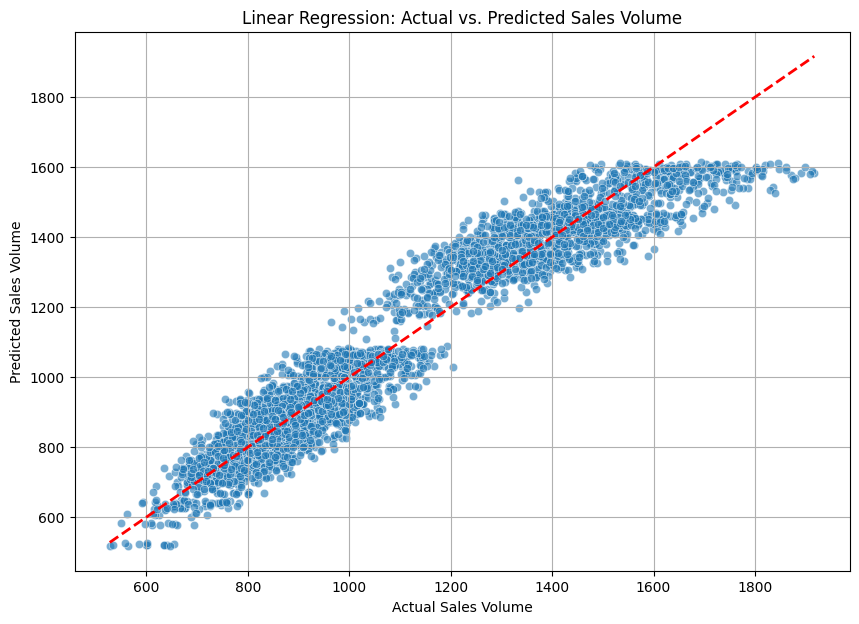

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 3. Create an instance of the LinearRegression model
linear_model = LinearRegression()

# 4. Train the LinearRegression model using the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

# 5. Make predictions on the test set using the trained model
y_pred_lr = linear_model.predict(X_test)

# 6. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared score
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"  R-squared (R2): {r2_lr:.2f}")

# 7. Create a scatter plot comparing the actual 'Sales Volume' values from the test set against the predicted 'Sales Volume' values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Linear Regression: Actual vs. Predicted Sales Volume")
plt.grid(True)
plt.show()

## Apply Decision Tree Regressor

### Subtask:
Train a Decision Tree Regressor model on the prepared data, evaluate its performance, and visualize its predictions against actual values.


**Reasoning**:
Following the instructions, I will now train a Decision Tree Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.



Decision Tree Regressor model trained successfully.

Decision Tree Regressor Performance Metrics:
  Mean Absolute Error (MAE): 82.46
  Mean Squared Error (MSE): 11053.10
  Root Mean Squared Error (RMSE): 105.13
  R-squared (R2): 0.87


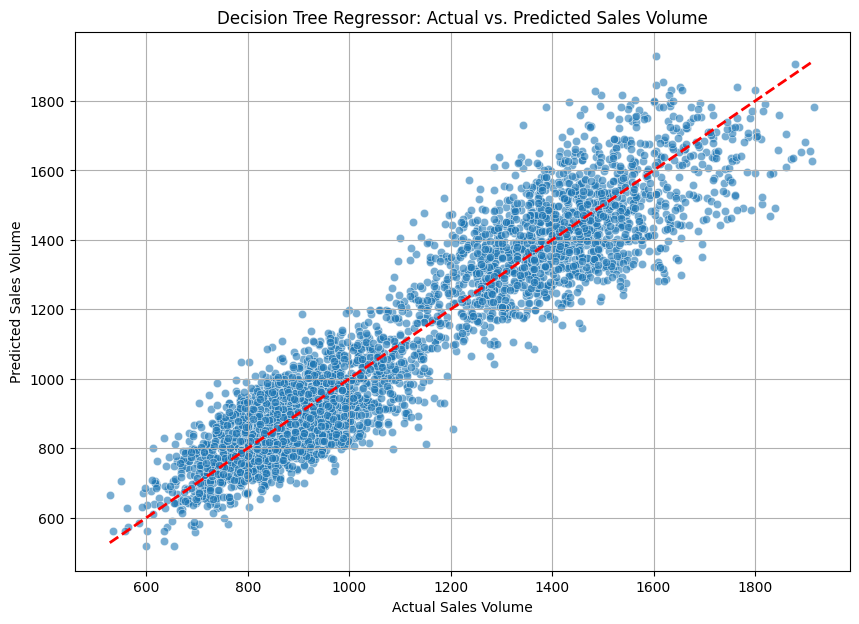

In [11]:
from sklearn.tree import DecisionTreeRegressor

# 1. Instantiate a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# 2. Train the Decision Tree Regressor model
dt_model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

# 3. Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# 4. Calculate performance metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Regressor Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"  Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"  R-squared (R2): {r2_dt:.2f}")

# 5. Create a scatter plot comparing actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Decision Tree Regressor: Actual vs. Predicted Sales Volume")
plt.grid(True)
plt.show()

## Apply Random Forest Regressor

### Subtask:
Train a Random Forest Regressor model, evaluate its performance, and visualize the actual versus predicted values.


**Reasoning**:
Following the instructions, I will now train a Random Forest Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
As per the instructions, I will now train a Random Forest Regressor model, make predictions, calculate the specified performance metrics, and visualize the actual versus predicted values.



Random Forest Regressor model trained successfully.

Random Forest Regressor Performance Metrics:
  Mean Absolute Error (MAE): 63.04
  Mean Squared Error (MSE): 6427.12
  Root Mean Squared Error (RMSE): 80.17
  R-squared (R2): 0.93


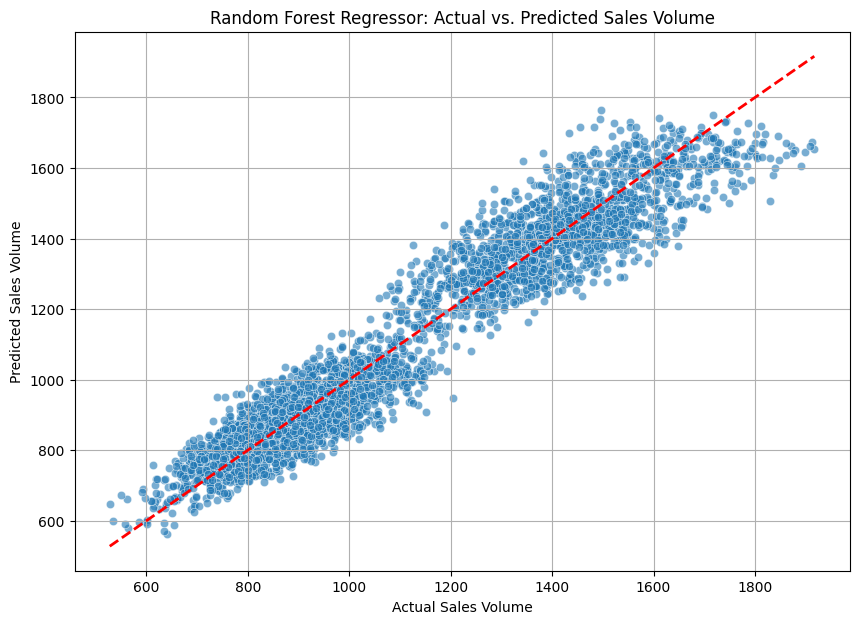

In [12]:
from sklearn.ensemble import RandomForestRegressor

# 1. Instantiate a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the Random Forest Regressor model
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

# 3. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.2f}")

# 5. Create a scatter plot comparing actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Random Forest Regressor: Actual vs. Predicted Sales Volume")
plt.grid(True)
plt.show()

## Apply Support Vector Regressor (SVR)

### Subtask:
Train a Support Vector Regressor (SVR) model, evaluate its performance, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Support Vector Regressor (SVR) model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
As per the instructions, I will now train a Support Vector Regressor (SVR) model, make predictions, calculate the specified performance metrics, and visualize the actual versus predicted values.



Training SVR model... This might take a while due to dataset size.
Support Vector Regressor model trained successfully.

Support Vector Regressor Performance Metrics:
  Mean Absolute Error (MAE): 137.61
  Mean Squared Error (MSE): 32147.57
  Root Mean Squared Error (RMSE): 179.30
  R-squared (R2): 0.63


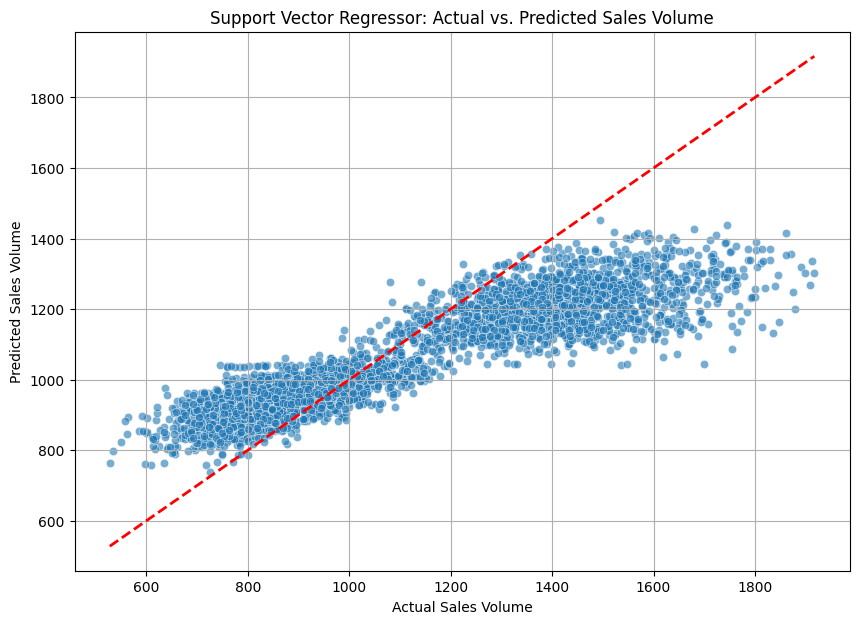

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# SVR is sensitive to feature scaling, so we'll use StandardScaler
# 1. Instantiate a StandardScaler and SVR model within a pipeline
# Due to computational intensity of SVR, using a subset of data or simpler kernel/parameters might be necessary for large datasets.
# For this task, we will try with default SVR with rbf kernel, but scaled data.
# Create a pipeline that first scales the data, then applies SVR
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# 2. Train the SVR model
print("Training SVR model... This might take a while due to dataset size.")
svr_model.fit(X_train, y_train)

print("Support Vector Regressor model trained successfully.")

# 3. Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# 4. Calculate performance metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nSupport Vector Regressor Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"  Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"  R-squared (R2): {r2_svr:.2f}")

# 5. Create a scatter plot comparing actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Support Vector Regressor: Actual vs. Predicted Sales Volume")
plt.grid(True)
plt.show()

## Apply Gradient Boosting Regressor

### Subtask:
Train a Gradient Boosting Regressor model, evaluate its performance, and visualize the actual versus predicted values.

## Apply Gradient Boosting Regressor

### Subtask:
Train a Gradient Boosting Regressor model, evaluate its performance, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
Following the instructions, I will now train a Gradient Boosting Regressor model, make predictions, evaluate its performance using MAE, MSE, RMSE, and R-squared, and visualize the actual versus predicted values.

**Reasoning**:
As per the instructions, I will now train a Gradient Boosting Regressor model, make predictions, calculate the specified performance metrics, and visualize the actual versus predicted values.



Gradient Boosting Regressor model trained successfully.

Gradient Boosting Regressor Performance Metrics:
  Mean Absolute Error (MAE): 59.08
  Mean Squared Error (MSE): 5675.85
  Root Mean Squared Error (RMSE): 75.34
  R-squared (R2): 0.94


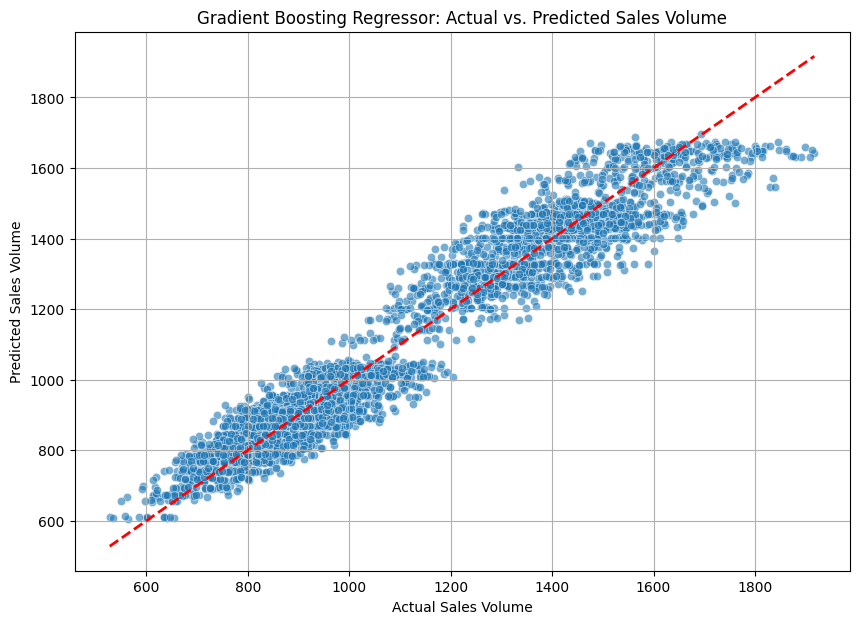

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Instantiate a GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# 2. Train the Gradient Boosting Regressor model
gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

# 3. Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# 4. Calculate performance metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"\nGradient Boosting Regressor Performance Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"  Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"  R-squared (R2): {r2_gbr:.2f}")

# 5. Create a scatter plot comparing actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted Sales Volume")
plt.grid(True)
plt.show()

## Summarize and Compare Model Performance

### Subtask:
Summarize and compare the performance metrics (MAE, MSE, RMSE, and R-squared) of all trained models (Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and Gradient Boosting Regressor).

**Reasoning**:
I need to collect the performance metrics from all trained models, create a summary table (DataFrame), and display it to fulfill the subtask of summarizing and comparing model performance. This will allow for an organized overview of how each model performed.



In [15]:
performance_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_svr, mae_gbr],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svr, mse_gbr],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svr, rmse_gbr],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svr, r2_gbr]
}

metrics_df = pd.DataFrame(performance_metrics)

print("\nSummary of Model Performance:")
print(metrics_df.round(2))



Summary of Model Performance:
               Model     MAE       MSE    RMSE  R2 Score
0  Linear Regression   62.39   6307.53   79.42      0.93
1      Decision Tree   82.46  11053.10  105.13      0.87
2      Random Forest   63.04   6427.12   80.17      0.93
3                SVR  137.61  32147.57  179.30      0.63
4  Gradient Boosting   59.08   5675.85   75.34      0.94


## Summary:

### Q&A
The task asked to summarize and compare the performance metrics of all models.
*   **Linear Regression**: MAE \$62.39\$, MSE \$6307.53\$, RMSE \$79.42\$, R2 \$0.93\$
*   **Decision Tree**: MAE \$82.46\$, MSE \$11053.10\$, RMSE \$105.13\$, R2 \$0.87\$
*   **Random Forest**: MAE \$63.04\$, MSE \$6427.12\$, RMSE \$80.17\$, R2 \$0.93\$
*   **SVR**: MAE \$137.61\$, MSE \$32147.57\$, RMSE \$179.30\$, R2 \$0.63\$
*   **Gradient Boosting**: MAE \$59.08\$, MSE \$5675.85\$, RMSE \$75.34\$, R2 \$0.94\$

### Data Analysis Key Findings
*   The `Business_sales_EDA.csv` dataset was reloaded using a semicolon (`;`) separator, correctly parsing 20252 entries and 17 columns.
*   Initial preprocessing involved dropping irrelevant columns such as `Product ID`, `url`, `name`, and `description`. The `currency` column was also dropped as it contained only a single unique value ('USD').
*   No missing values were present in the DataFrame after the initial column drops, thus no further imputation or row removal was required.
*   Ten categorical columns were identified and successfully one-hot encoded (with `drop_first=True`), resulting in 33 new boolean columns and a final preprocessed DataFrame (`df_encoded`) with 35 columns.
*   The data was split into training (16201 samples) and testing (4051 samples) sets for model evaluation.
*   **Gradient Boosting Regressor** achieved the best performance with an R-squared of \$0.94\$, MAE of \$59.08\$, MSE of \$5675.85\$, and RMSE of \$75.34\$.
*   **Linear Regression** and **Random Forest Regressor** also performed strongly, both yielding an R-squared of \$0.93\$ with MAE values of \$62.39\$ and \$63.04\$, respectively.
*   The **Decision Tree Regressor** showed moderate performance with an R-squared of \$0.87\$ and an MAE of \$82.46\$.
*   The **Support Vector Regressor (SVR)** performed the weakest among all models, with an R-squared of \$0.63\$, MAE of \$137.61\$, MSE of \$32147.57\$, and RMSE of \$179.30\$, despite applying `StandardScaler`.

### Insights or Next Steps
*   The **Gradient Boosting Regressor** is the most suitable model for predicting 'Sales Volume' given its superior performance metrics. This suggests that an ensemble method focused on sequentially improving predictions is effective for this dataset.
*   Further hyperparameter tuning for the Gradient Boosting and Random Forest models could potentially yield even better performance. Additionally, exploring feature engineering based on the importance of existing features could provide more predictive power.
